In [269]:
# Setup for Google Colab (optional)
import sys

from py4DSTEM.preprocess import swap_RQ
from py4D_browser.update_views import get_virtual_image_detector

if 'google.colab' in sys.modules:
    print("Running in Google Colab")
    # Install required packages
    !pip install -q py4DSTEM hyperspy scikit-image matplotlib numpy scipy
    
    # Clone the repository to access data
    !git clone -q https://github.com/NU-MSE-LECTURES/465-WINTER2026.git
    import os
    os.chdir('/content/465-WINTER2026')
    
    # Set up file handling
    from google.colab import files
    print("Colab setup complete!")
else:
    print("Running in local environment")

ModuleNotFoundError: No module named 'PyQt5'

<a href="https://colab.research.google.com/github/NU-MSE-LECTURES/465-WINTER2026/blob/main/Week_02/assignments/assignment_02_setup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 02: 4D-STEM Foundations

Complete this assignment to demonstrate your understanding of 4D-STEM data analysis and calibration.


In [1]:
# Colab setup
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab. Installing requirements...")
    !pip install hyperspy ase py4DSTEM
    !git clone https://github.com/NU-MSE-LECTURES/465_Computational_Microscopy_2026.git
    print("Setup complete.")
except ImportError:
    IN_COLAB = False
    print("Not running in Google Colab.")

Not running in Google Colab.


## Task 1: Distinguish Navigation vs. Signal Axes

In your notebook, define the "Navigation Axes" (where the measurement is made, e.g., x, y scan positions).

Define the "Signal Axes" (what is measured at each point, e.g., an EELS spectrum or a 2D diffraction pattern).

Use signal.axes manager to print and verify the dimensionality of a 4D-STEM dataset (expected: 2 Navigation, 2 Signal).

In [51]:
import hyperspy.api as hs
import py4DSTEM
import numpy as np
# Load the Au calibration reference dataset
# This is a small 4D-STEM dataset with known crystalline structures

filepath = '/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_02/assignments/raw_data/Si-SiGe.dm4'

try:
    s = py4DSTEM.io.import_file(filepath)
    print(f"✓ Dataset loaded successfully!")
    print(f"\nDataset information:")
    print(f"  Shape: {dataset_calib.shape} (order: Rx, Ry, Qx, Qy)")
    print(f"  Diffraction pattern size: {dataset_calib.shape[2:]} pixels")
    print(f"  Scan area: {dataset_calib.shape[0]} x {dataset_calib.shape[1]} pixels")
except FileNotFoundError:
    print(f"✗ File not found: {filepath}")
    print("Make sure SI_Au_calib.dm4 is in the raw_data folder")



# Navigation Axes - the scan positions
#axes_manager[0].name = 'Rx' #axis name
#axes_manager[0].units = 'x' #axis units
#axes_manager[0].scale = 1 #scale
#axes_manager[0].offset = 0 #offset

#axes_manager[1].name = 'Ry' #axis name
#axes_manager[1].units = 'y' #axis units
#axes_manager[1].scale = 0.1 #scale
#axes_manager[1].offset = 0 #offset
# Signal Axes - the measurements made at each scan position

✓ Dataset loaded successfully!

Dataset information:
  Shape: (480, 448, 77, 17) (order: Rx, Ry, Qx, Qy)
  Diffraction pattern size: (77, 17) pixels
  Scan area: 480 x 448 pixels


## Task 2: Load and Calibrate 4D-STEM Data

Use py4DSTEM.io.read to load a 4D-STEM dataset (e.g., .dm4 or .h5).

**Note:** The dataset Si-SiGe.dm4 should be available in the raw_data folder.

Set the scan step size (real space calibration) using dataset.set_scan_step_size().

Perform Center of Mass (CoM) correction using dataset.get_diffraction_shifts() to center the unscattered beam.

Current Calibration Information:

Data shape: (480, 448, 77, 17)
Data type: uint16
Min value: 195
Max value: 38473
Mean value: 253.63
Current Calibration Information:

Data shape: (77, 17, 480, 448)
Data type: uint16
Min value: 195
Max value: 38473
Mean value: 253.63
Calibration( A Metadata instance called 'calibration', containing the following fields:

             Q_pixel_size:    0.01
             R_pixel_size:    0.1
             Q_pixel_units:   A^-1
             R_pixel_units:   nm
             QR_flip:         False
)


Finding origins: 100%|██████████| 1.31k/1.31k [00:07<00:00, 181DP/s]


Mean origin - qx0: 243.3295981058158
Mean origin - qy0: 226.79224018194847
Calculating CoM...
CoM shape: (77, 17) (77, 17)


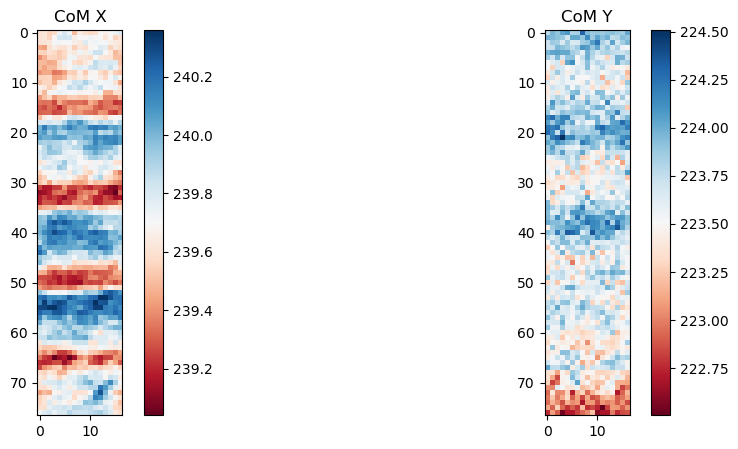

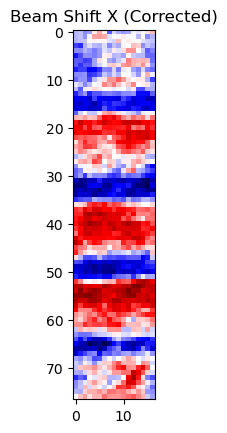

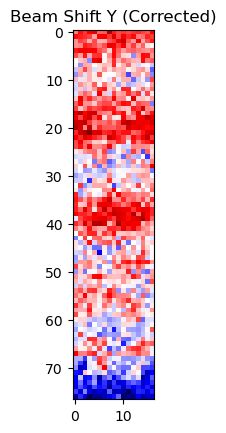

In [256]:
#Used Claude to help generate/troubleshoot code for determining origin and center of mass calculations/visualization
import py4DSTEM
import numpy as np

#step_size = 0.1
filepath = '/Users/ginocangialosi/Documents/MSE 465/MATSCI465_GinoCangialosi/Week_02/assignments/raw_data/Si-SiGe.dm4'


dataset = py4DSTEM.io.import_file(filepath)


print("Current Calibration Information:")
print(f"\nData shape: {dataset.data.shape}")
print(f"Data type: {dataset.data.dtype}")
print(f"Min value: {dataset.data.min()}")
print(f"Max value: {dataset.data.max()}")
print(f"Mean value: {dataset.data.mean():.2f}")

from py4DSTEM import show
dp = dataset.data[:,:,10,10]


dataset.swap_RQ() #swap the real and diffraction order they are wrong from initial file
#these new print lines confirm swap
print("Current Calibration Information:")
print(f"\nData shape: {dataset.data.shape}")
print(f"Data type: {dataset.data.dtype}")
print(f"Min value: {dataset.data.min()}")
print(f"Max value: {dataset.data.max()}")
print(f"Mean value: {dataset.data.mean():.2f}")

dp2 = dataset.data[:,:,10,10]

#dataset.get_virtual_diffraction_shifts_center()

#dataset.calibration['Q_pixel_size'] = 2
#dataset.calibration['set_step_size_nm'] = step_size
# Example manual calibration
# Assuming your dataset object is named 'dataset'

# set step calibration parameters for real and diffraction space
dataset.calibration.R_pixel_size = 0.1
dataset.calibration.R_pixel_units = 'nm'
dataset.calibration.Q_pixel_size = 0.01
dataset.calibration.Q_pixel_units = 'A^-1'
print(dataset.calibration)

#Was probing to make sure the swap of real and diffraction changed correctly
#show(dp)
#show(dp2)

#Set the origin beam position
qx0, qy0, mask = py4DSTEM.process.calibration.origin.get_origin(
    dataset,
    r=None,
    rscale=1.2,
    dp_max=None,
    mask=None,
    fast_center=False
)


#Set the origin in the calibration object
dataset.calibration.set_origin_meas((qx0, qy0))

#Calculate and set the mean origin
qx0_mean = np.mean(qx0)
qy0_mean = np.mean(qy0)
dataset.calibration.set_origin((qx0_mean, qy0_mean))

#Verify by printing
print("Mean origin - qx0:", dataset.calibration.get_qx0_mean())
print("Mean origin - qy0:", dataset.calibration.get_qy0_mean())

#Calculating center of mass for all diffraction patterns
from py4DSTEM.process.calibration import get_CoM

#Set shape of scan
scan_shape = dataset.data.shape[:2]  # (scan_x, scan_y)

#Make center of mass arrays
CoMx = np.zeros(scan_shape)
CoMy = np.zeros(scan_shape)

#Calculate center of mass for each diffraction pattern
print("Calculating CoM...")
for i in range(scan_shape[0]):
    for j in range(scan_shape[1]):
        dp = dataset.data[i, j, :, :]  # Get single diffraction pattern
        com_x, com_y = get_CoM(dp)
        CoMx[i, j] = com_x
        CoMy[i, j] = com_y

print("CoM shape:", CoMx.shape, CoMy.shape)

#Visualize center of mass for x and y
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
im1 = ax1.imshow(CoMx, cmap='RdBu')
ax1.set_title('CoM X')
plt.colorbar(im1, ax=ax1)
im2 = ax2.imshow(CoMy, cmap='RdBu')
ax2.set_title('CoM Y')
plt.colorbar(im2, ax=ax2)
plt.show()

# Calculate the shift relative to the center of the diffraction plane
shift_x = CoMx - dataset.calibration.get_qx0_mean()
shift_y = CoMy - dataset.calibration.get_qy0_mean()



# Now visualize the actual shifts
plt.imshow(shift_x,cmap='seismic')
plt.title("Beam Shift X (Corrected)")
plt.show()
plt.imshow(shift_y,cmap='seismic')
plt.title("Beam Shift Y (Corrected)")
plt.show()



## Task 3: Virtual Detector Reconstruction

Generate a Virtual Bright Field (BF) image by integrating the central transmitted disk.

Generate an Annular Dark Field (ADF) image by integrating the scattered electrons in an outer ring.

Compare the Z-contrast in the ADF image to the diffraction contrast in the BF image.

100%|██████████| 1309/1309 [00:01<00:00, 1048.07it/s]


Virtual image shape: (77, 17)
Virtual image dtype: float64


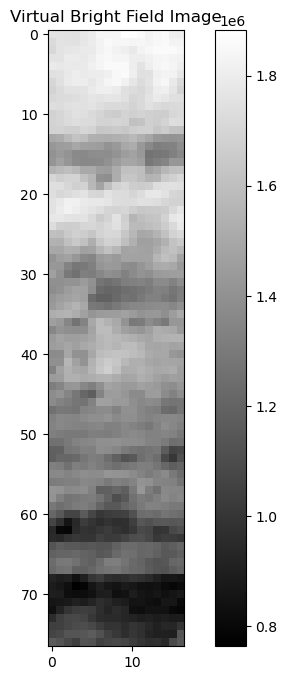

Generating VDF with annulus: 40 to 100 pixels


100%|██████████| 1309/1309 [00:01<00:00, 1221.67it/s]


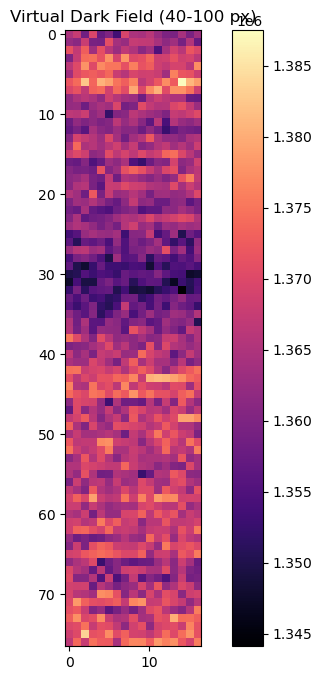

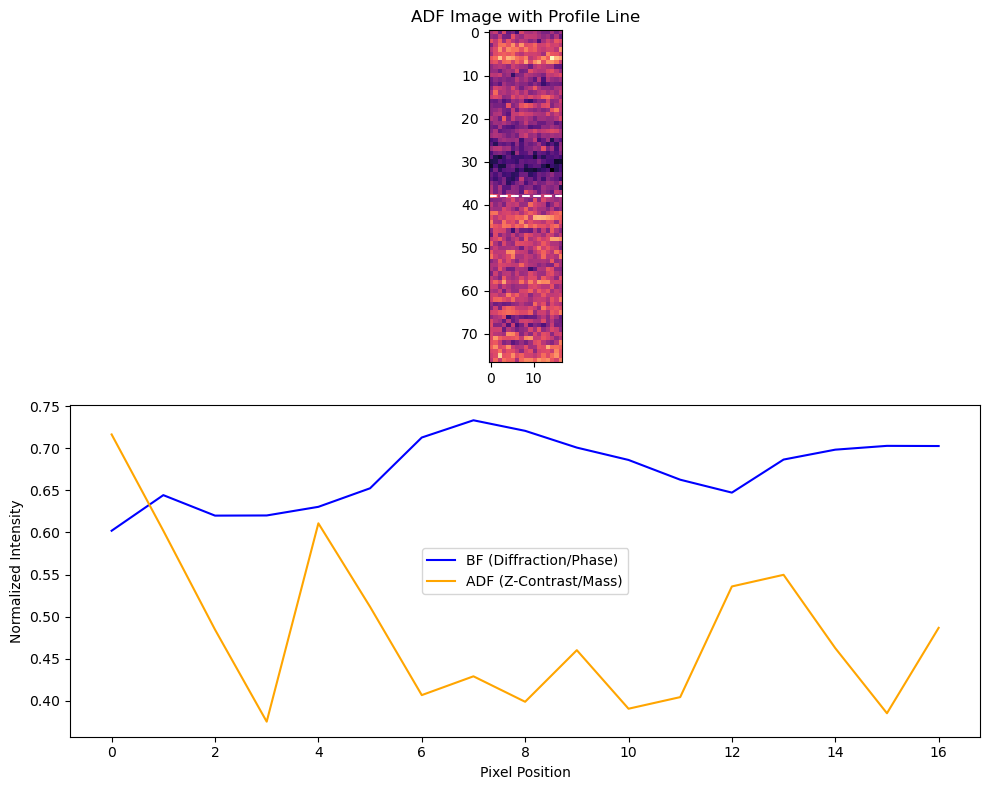

In [243]:
#Used Claude to help generate/troubleshoot code and compare the z-contrast to the diffraction contrast
import py4DSTEM
import numpy as np



#Virtual image information for the bright field image
virtual_img_obj = dataset.get_virtual_image(
    mode='circle',
    geometry=((0, 0), 10),  # ((center_x, center_y), radius)
    centered=True,
    calibrated=False, #kept this as false because don't have real calibration data; need to find how to get
    shift_center=False, #want to ask about this
    subpixel=False,
    verbose=True,
    dask=False,
    return_mask=False,
    returncalc=True,
)

#Extracting the data array from the VirtualImage object
img = virtual_img_obj.data

print("Virtual image shape:", img.shape)
print("Virtual image dtype:", img.dtype)

#Plot the bright field image
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.title('Virtual Bright Field Image')
plt.colorbar()
plt.show()


#Stating variables needed for the annular geometry
#Note: inner_radius should be larger than your BF radius (e.g., >10)
#outer_radius captures the scattered signal
inner_r = 40
outer_r = 100
vdf_geometry = ((qx0_mean, qy0_mean), (inner_r, outer_r))

print(f"Generating VDF with annulus: {inner_r} to {outer_r} pixels")

vdf_obj = dataset.get_virtual_image(
    mode='annular',
    geometry=vdf_geometry, # Pass ((x,y), (r_in, r_out))
    centered=True,
    calibrated=False,
    shift_center=False, #want to ask about this
    returncalc=True,
)

#Extract and Plot
vdf_img = vdf_obj.data

fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(vdf_img, cmap='magma') # 'magma' or 'inferno' are great for DF
ax.set_title(f'Virtual Dark Field ({inner_r}-{outer_r} px)')
plt.colorbar(im)
plt.show()

#Comparison of bright and dark field
import numpy as np
import matplotlib.pyplot as plt

#Normalizes the images for fair comparison (0 to 1 scale)
bf_norm = (img - img.min()) / (img.max() - img.min())
vdf_norm = (vdf_img - vdf_img.min()) / (vdf_img.max() - vdf_img.min())

#Define a line for the profile (y-coordinate, then start_x to end_x)
row_idx = scan_shape[0] // 2  # Middle of the image
line_profile_bf = bf_norm[row_idx, :]
line_profile_vdf = vdf_norm[row_idx, :]

#Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

#Show where the line is
ax1.imshow(vdf_norm, cmap='magma')
ax1.axhline(row_idx, color='white', linestyle='--')
ax1.set_title("ADF Image with Profile Line")

#Plot the profiles
ax2.plot(line_profile_bf, label='BF (Diffraction/Phase)', color='blue')
ax2.plot(line_profile_vdf, label='ADF (Z-Contrast/Mass)', color='orange')
ax2.set_xlabel("Pixel Position")
ax2.set_ylabel("Normalized Intensity")
ax2.legend()

plt.tight_layout()
plt.show()

## Task 4: Basic 4D-STEM Visualization

Launch the interactive 4D-STEM browser using dataset.show() (if using a local GUI) or py4D.show_image().

Export a publication-quality figure of a virtual ADF image with a scale bar and a perceptually uniform colormap (e.g., magma).

100%|██████████| 1309/1309 [00:01<00:00, 996.02it/s] 
Adding colorbar to a different Figure <Figure size 800x800 with 2 Axes> than <Figure size 1000x1000 with 2 Axes> which fig.colorbar is called on.


Image shape: (77, 17)
Scale bar: 1.0 nm = 10.0 pixels


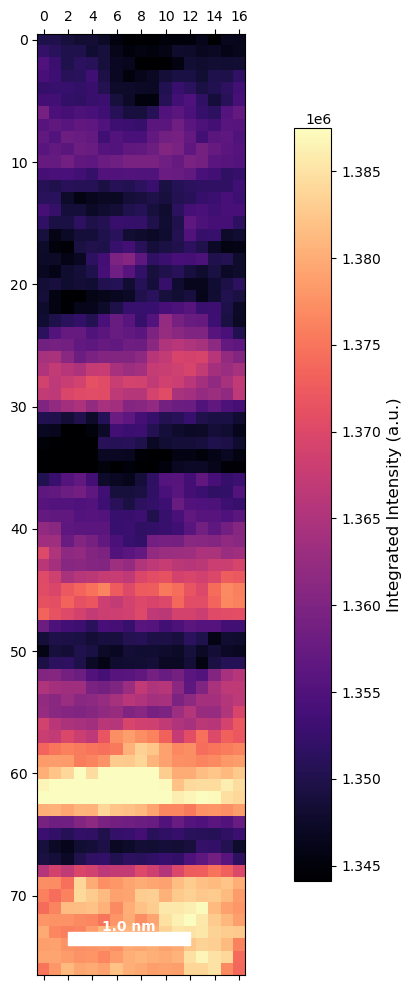

In [244]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import py4DSTEM

#Dark field data
vdf_obj = dataset.get_virtual_image(
    mode='annular',
    geometry=((qx0_mean, qy0_mean), (40, 100)),  # Center and (inner, outer) radii
    centered=False,
    calibrated=False,
)
vdf_image = vdf_obj.data

#pixel size
pixel_size = 0.1

#Scale bar information
scale_bar_length = 1.0
scale_bar_pixels = scale_bar_length / pixel_size

print(f"Image shape: {vdf_image.shape}")
print(f"Scale bar: {scale_bar_length} nm = {scale_bar_pixels} pixels")

#Plot with py4Dstem.show and magma
fig, ax = py4DSTEM.show(
    vdf_image,
    cmap='magma',
    returnfig=True,
    figsize=(10, 10)
)

#given from prompt, scale bar positioning and making color bar
if scale_bar_pixels < vdf_image.shape[1] - 5:
    # Position scale bar in bottom-left corner
    bar_x, bar_y = 2, vdf_image.shape[0] - 4
    scale_bar = Rectangle((bar_x, bar_y), scale_bar_pixels, 1, fill=True, color='white', linewidth=1)
    ax.add_patch(scale_bar)
    ax.text(bar_x + scale_bar_pixels/2, bar_y - 1, f'{scale_bar_length} nm', ha='center', va='top',
            color='white', fontsize=10, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.8)
cbar.set_label('Integrated Intensity (a.u.)', fontsize=12)

plt.tight_layout()
plt.savefig('virtual_adf_figure_sisige.png', dpi=300, bbox_inches='tight')
plt.show()

## Task 5: Finalize and Submit

Update your README.md with a brief explanation of how virtual detectors allow post-acquisition imaging.

Push the completed Week 02 notebook to your GitHub repository.

Submit the repository link on Canvas.

In [ ]:
# Your code here